# 0 - IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from scipy import stats as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# 1 - LOAD DATASET BANK - LOAN - PROPOSAL - CLASSIFICATION

In [2]:
path = "/Users/emanuelelippi/Library/Mobile Documents/com~apple~CloudDocs/Università/Secondo_Anno/Statistica numerica/Lippi_Emanuele"
os.chdir(path)
# Load the dataset
df = pd.read_csv(os.path.join(path, "Bank_Personal_Loan_Modelling.csv"))

In [3]:
# Stampo le prime righe del dataset
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


***Attribute Information:***

1. <mark>ID</mark> : ID Cliente

2. <mark>Age</mark> : Eta' del cliente

3. <mark>Experience</mark> : anni di esperienza lavorativa

4. <mark>Income</mark> : reddito annuuo ($000)

5. <mark>ZIP Code</mark> : CAP

6. <mark>Family</mark> : Taglia del nucleo familiare del cliente

7. <mark>CCAvg</mark> : Spesa media mensile con la carta di credito ($000)

8. <mark>Education</mark> : Livello di educazione.
 1:  Laurea Triennale;
 2:  Laura Magistrale;
 3:  Dottorato di ricerca;

9.  <mark>Mortage</mark> : Valore del mutuo sulla casa se presente. ($000)

10. <mark>Personal Loan</mark> : ha accettato la proposta di prestito personale l'ultima campagna?

11. <mark>Securities Account</mark> : Il cliente ha un conto titoli presso la banca?

12. <mark>CD Account</mark> : Il cliente ha un conto di deposito vincolato presso la banca?

13. <mark>Online</mark> : Il cliente utilizza Internet Banking service?

14. <mark>Credit card</mark> : Il cliente utilizza una carta di credito emessa dalla banca?

In [4]:
# stampo le dimensioni del dataset
print("Dimensioni del dataset:", df.shape)

Dimensioni del dataset: (5000, 14)


In [5]:
# stampo informazioni generali sul dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# stampo le statistiche descrittive del dataset
print("Statistiche descrittive del dataset:")
df.describe().T

Statistiche descrittive del dataset:


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# controllo la presenza di valori duplicati
df.duplicated().sum()

np.int64(0)

In [8]:
# controllo la presenza di valori mancanti
df.isnull().sum().to_frame().T

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***OSSERVAZIONI:***<br>
- il dataset non contiene valori null o valori duplicati
- e' composto da 14 colonne numeriche e 5000 osservazioni

# 2 - PRE-PROCESSING

In [9]:
# Eliminazione delle colonne non necessarie
df.drop(columns=["ID", "ZIP Code"], inplace=True)

In [ ]:
# Controllo la presenza di valori non realistici come negativi
print("Controllo valori negativi:")
df[df < 0].count() #piuttsto toglierli, forzatura

Controllo valori negativi:


Age                    0
Experience            52
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [11]:
# La colonna "Experience" non può essere negativa, quindi la correggo mettendo i valori negativi positivi tramite il valore assoluto
df["Experience"] = df["Experience"].abs()

In [12]:
# La colonna "CCAvg" rappresenta la media mensile delle spese con carta di credito, quindi la converto nella media annuale
df["CCAvg"] = df["CCAvg"] * 12
df["CCAvg"].describe()

count    5000.000000
mean       23.255256
std        20.971908
min         0.000000
25%         8.400000
50%        18.000000
75%        30.000000
max       120.000000
Name: CCAvg, dtype: float64

In [13]:
# Separo le statistiche continute dalle discrete
discrate_col = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
continue_col = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [14]:
# controllo i valori unici delle variabili discrete
for col in discrate_col:
    print(f"Valori unici di {col}: {df[col].unique()}")

Valori unici di Family: [4 3 1 2]
Valori unici di Education: [1 2 3]
Valori unici di Personal Loan: [0 1]
Valori unici di Securities Account: [1 0]
Valori unici di CD Account: [0 1]
Valori unici di Online: [0 1]
Valori unici di CreditCard: [0 1]


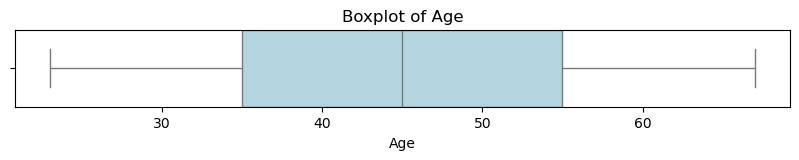

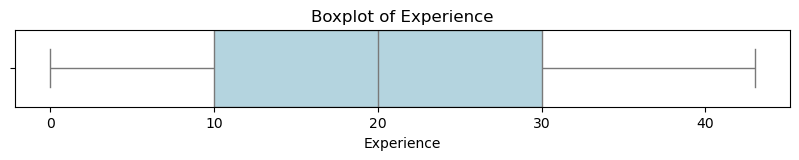

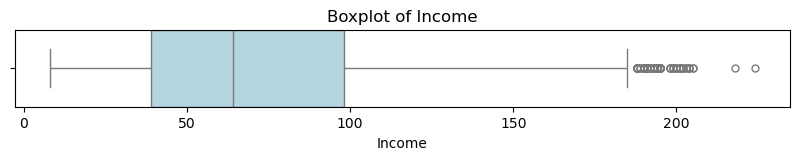

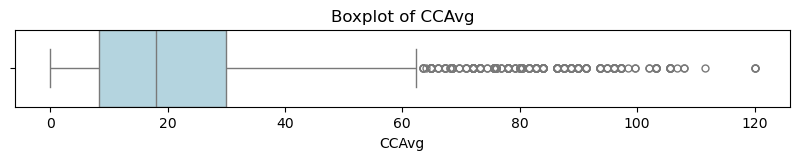

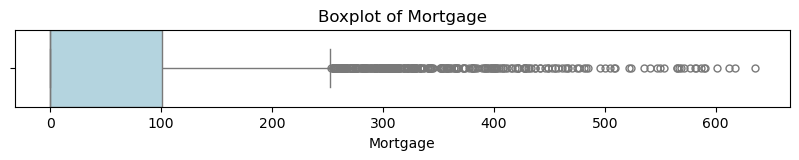

In [15]:
# controllo eventuali outliers con un boxplot
for col in continue_col:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[col], width=1, color='lightblue', fliersize=5)
    plt.title(f"Boxplot of {col}")
    plt.show()

***Osservazioni:***<br>
- colonne senza outlier: age, experience
- colonne con outlier: Income, CCAvg e Mortage

In [16]:
# Calcolo gli outliers utilizzando il metodo IQR (Interquartile Range)
Q1 = df[continue_col].quantile(0.25)
Q3 = df[continue_col].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[continue_col] < (Q1 - 1.5 * IQR)) | (df[continue_col] > (Q3 + 1.5 * IQR)))
outliers_count = outliers.sum()
print("Numero di outliers per colonna:")
print(outliers_count.to_frame().T)


Numero di outliers per colonna:
   Age  Experience  Income  CCAvg  Mortgage
0    0           0      96    324       291


***Utilizzo Capping***<br>
metodo che serve a limitare (tagliare) i valori di una Serie o colonna in un certo intervallo:

Tutti i valori sotto il minimo vengono portati al minimo.
Tutti i valori sopra il massimo vengono portati al massimo.
I valori dentro l'intervallo restano invariati.

In [17]:
# gestisco gli outliers con capping
for col in ['Income', 'CCAvg', 'Mortgage']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


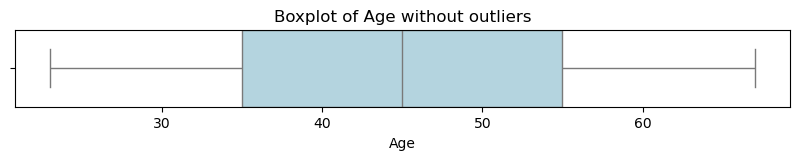

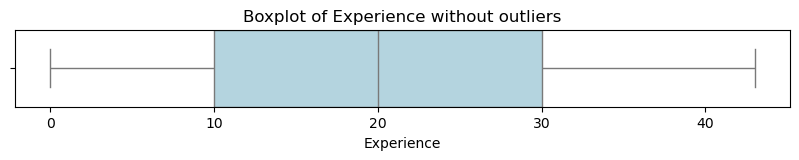

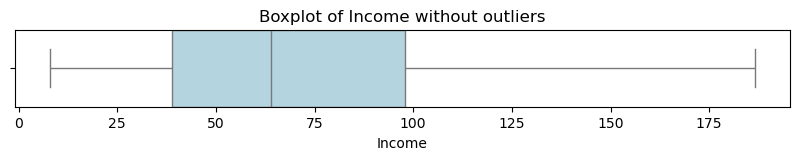

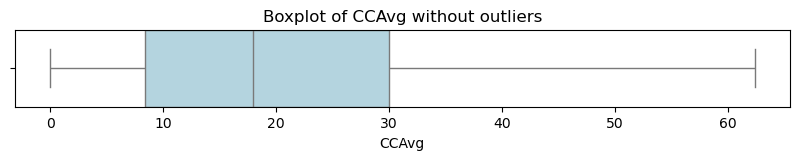

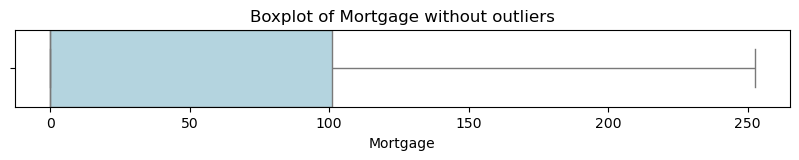

In [18]:
# Visualizzo ora i boxplot senza outliers
for col in continue_col:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[col], width=1, color='lightblue', fliersize=5)
    plt.title(f"Boxplot of {col} without outliers")
    plt.show()

# 3 - EDA

In [19]:
# divido le colonne in 3 gruppi: continue, discrete e target
target_col = ['Personal Loan']
continue_col = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
discrate_col = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

/var/folders/xb/9lxmf13n4bl6ch_kbhqmb5gr0000gn/T/ipykernel_3639/2092624534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, palette='Set2')
/var/folders/xb/9lxmf13n4bl6ch_kbhqmb5gr0000gn/T/ipykernel_3639/2092624534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, palette='Set2')
/var/folders/xb/9lxmf13n4bl6ch_kbhqmb5gr0000gn/T/ipykernel_3639/2092624534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=df, x=col, palette='Set2')
/var/folders/xb/9lxmf13n4bl6ch_kbhqmb5gr000

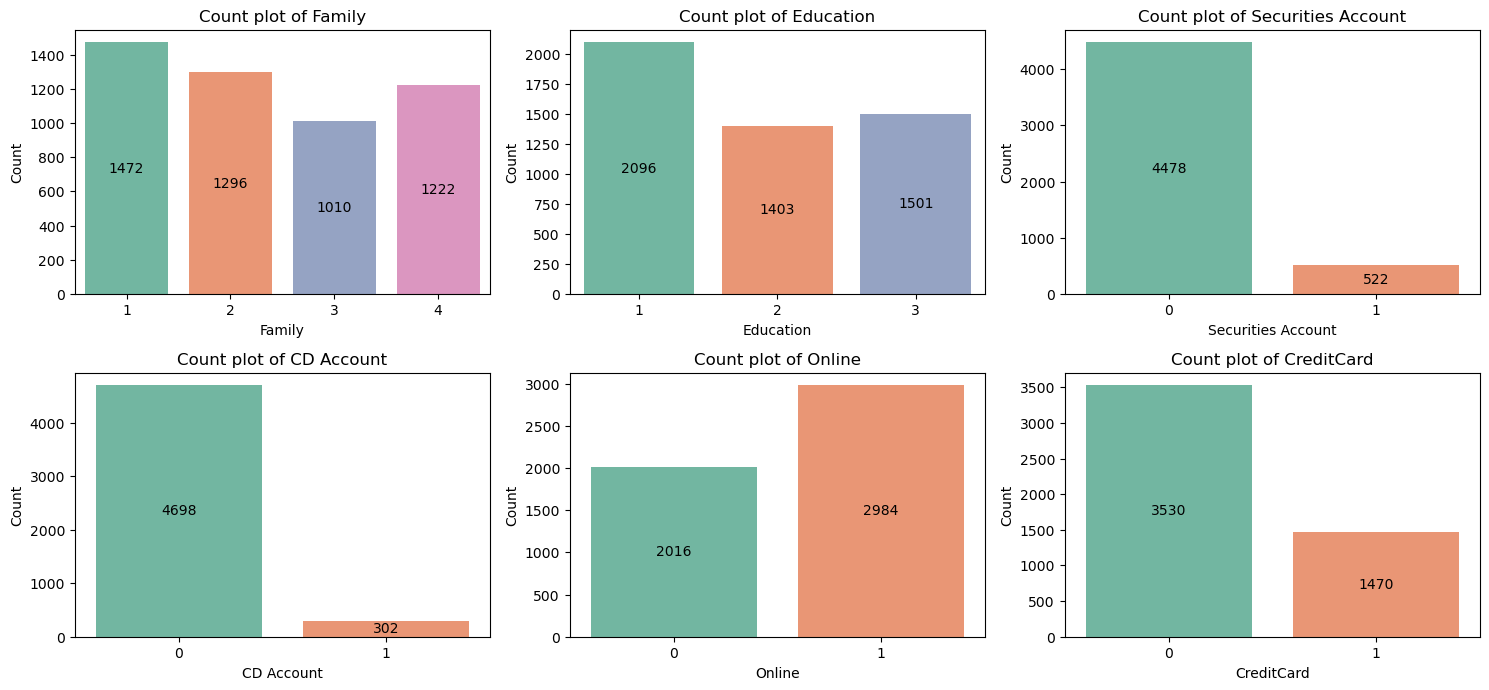

In [20]:
# Stampo i i grafici a barre per le variabili discrete
plt.figure(figsize=(15,10))

for i,col in enumerate(discrate_col, 1):
    plt.subplot(3, 3, i)
    plot = sns.countplot(data=df, x=col, palette='Set2')
    
    # Add count labels on inside each bar
    for container in plot.containers:
        plot.bar_label(container, fmt='%d', label_type='center', color='black')

    plt.title(f"Count plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

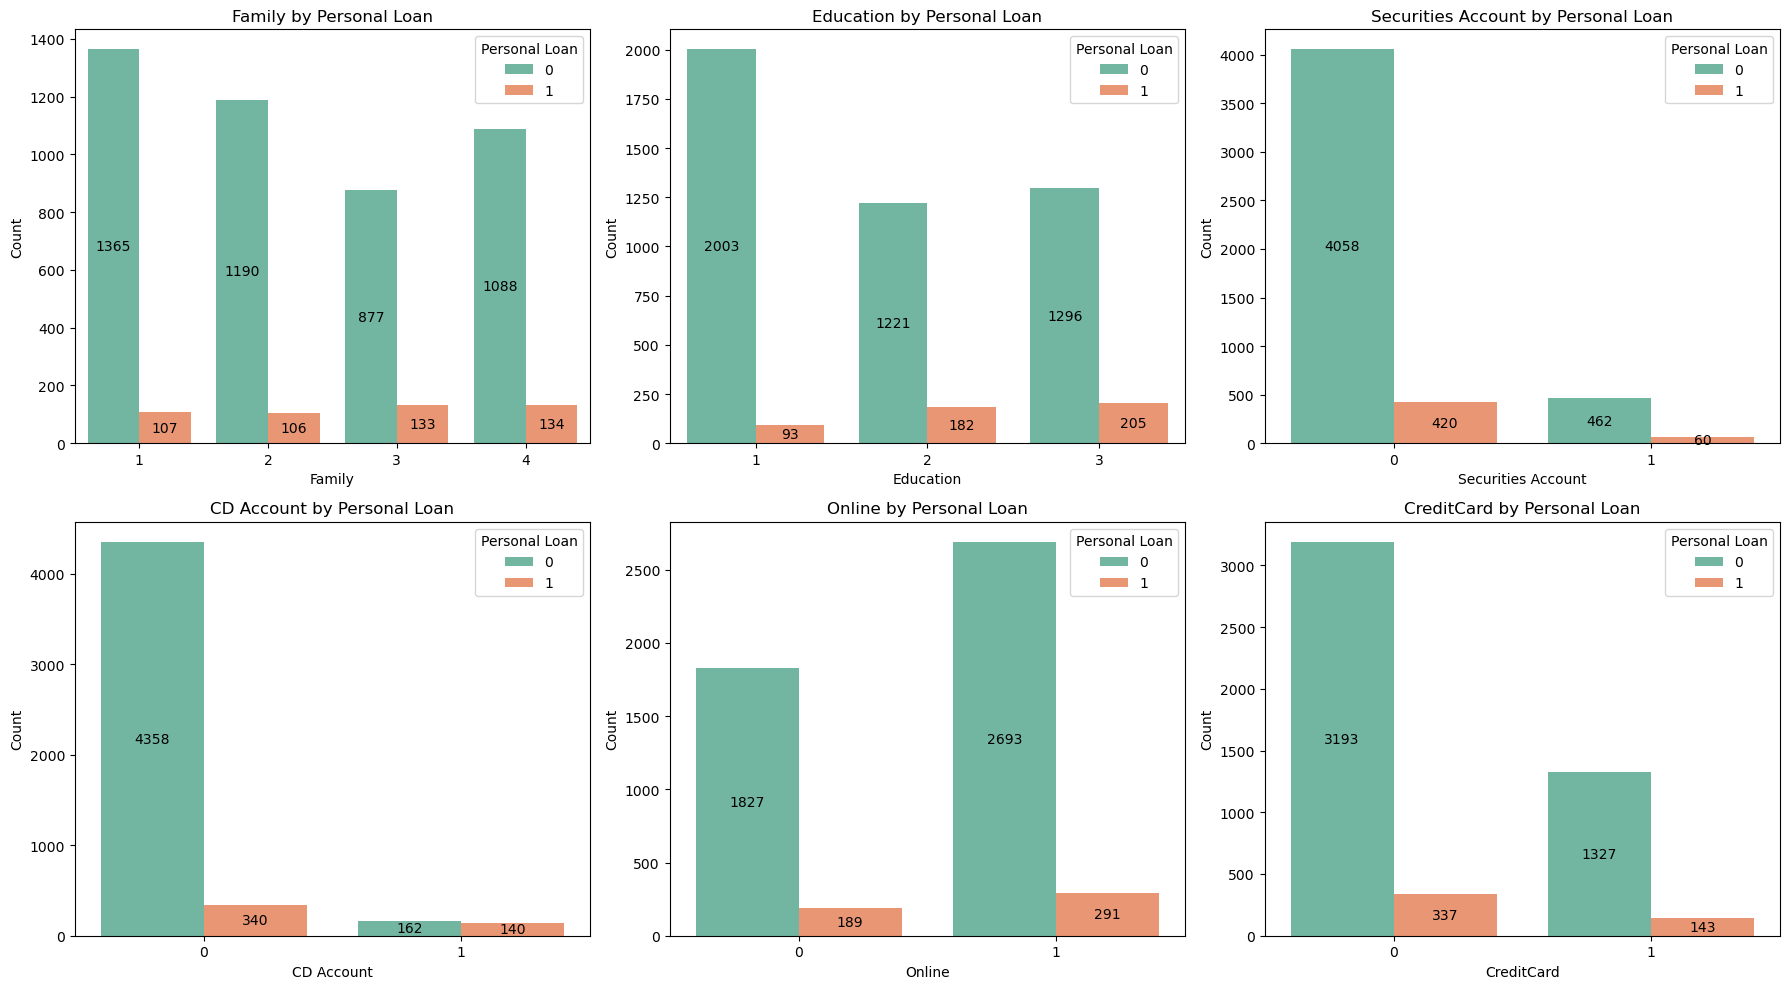

In [21]:
# countplot delle variabili discrete in relazione alla variabile target
# Unico plot con tutti i countplot delle variabili discrete rispetto al target
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(discrate_col):
    sns.countplot(data=df, x=col, hue='Personal Loan', palette='Set2', ax=axes[i])
    # Add count labels on inside each bar
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', label_type='center', color='black')
    axes[i].set_title(f"{col} by Personal Loan")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Personal Loan', loc='upper right')

plt.tight_layout()
plt.show()

***OSSERVAZIONI:***
- Nuclei familiari composti da 3/4 persone sembrano piu' propensi ad accettare la proposta di mutuo
- Al crescere del livello di educazione cresce anche l'accettazione dei mutui
- Sembra che le persona con non hanno un Security Account presso la banca sono piu' propense ad accettare il mutuo
- Sembra che le persone che hanno un CD Account siano piu' propense ad accettare il mutuo
- Le persone che utilizzano l'Internet Banking sono piu' predisposte ai mutui
- Le persone che non hanno una carta di credito sembra stipulino piu' mutui

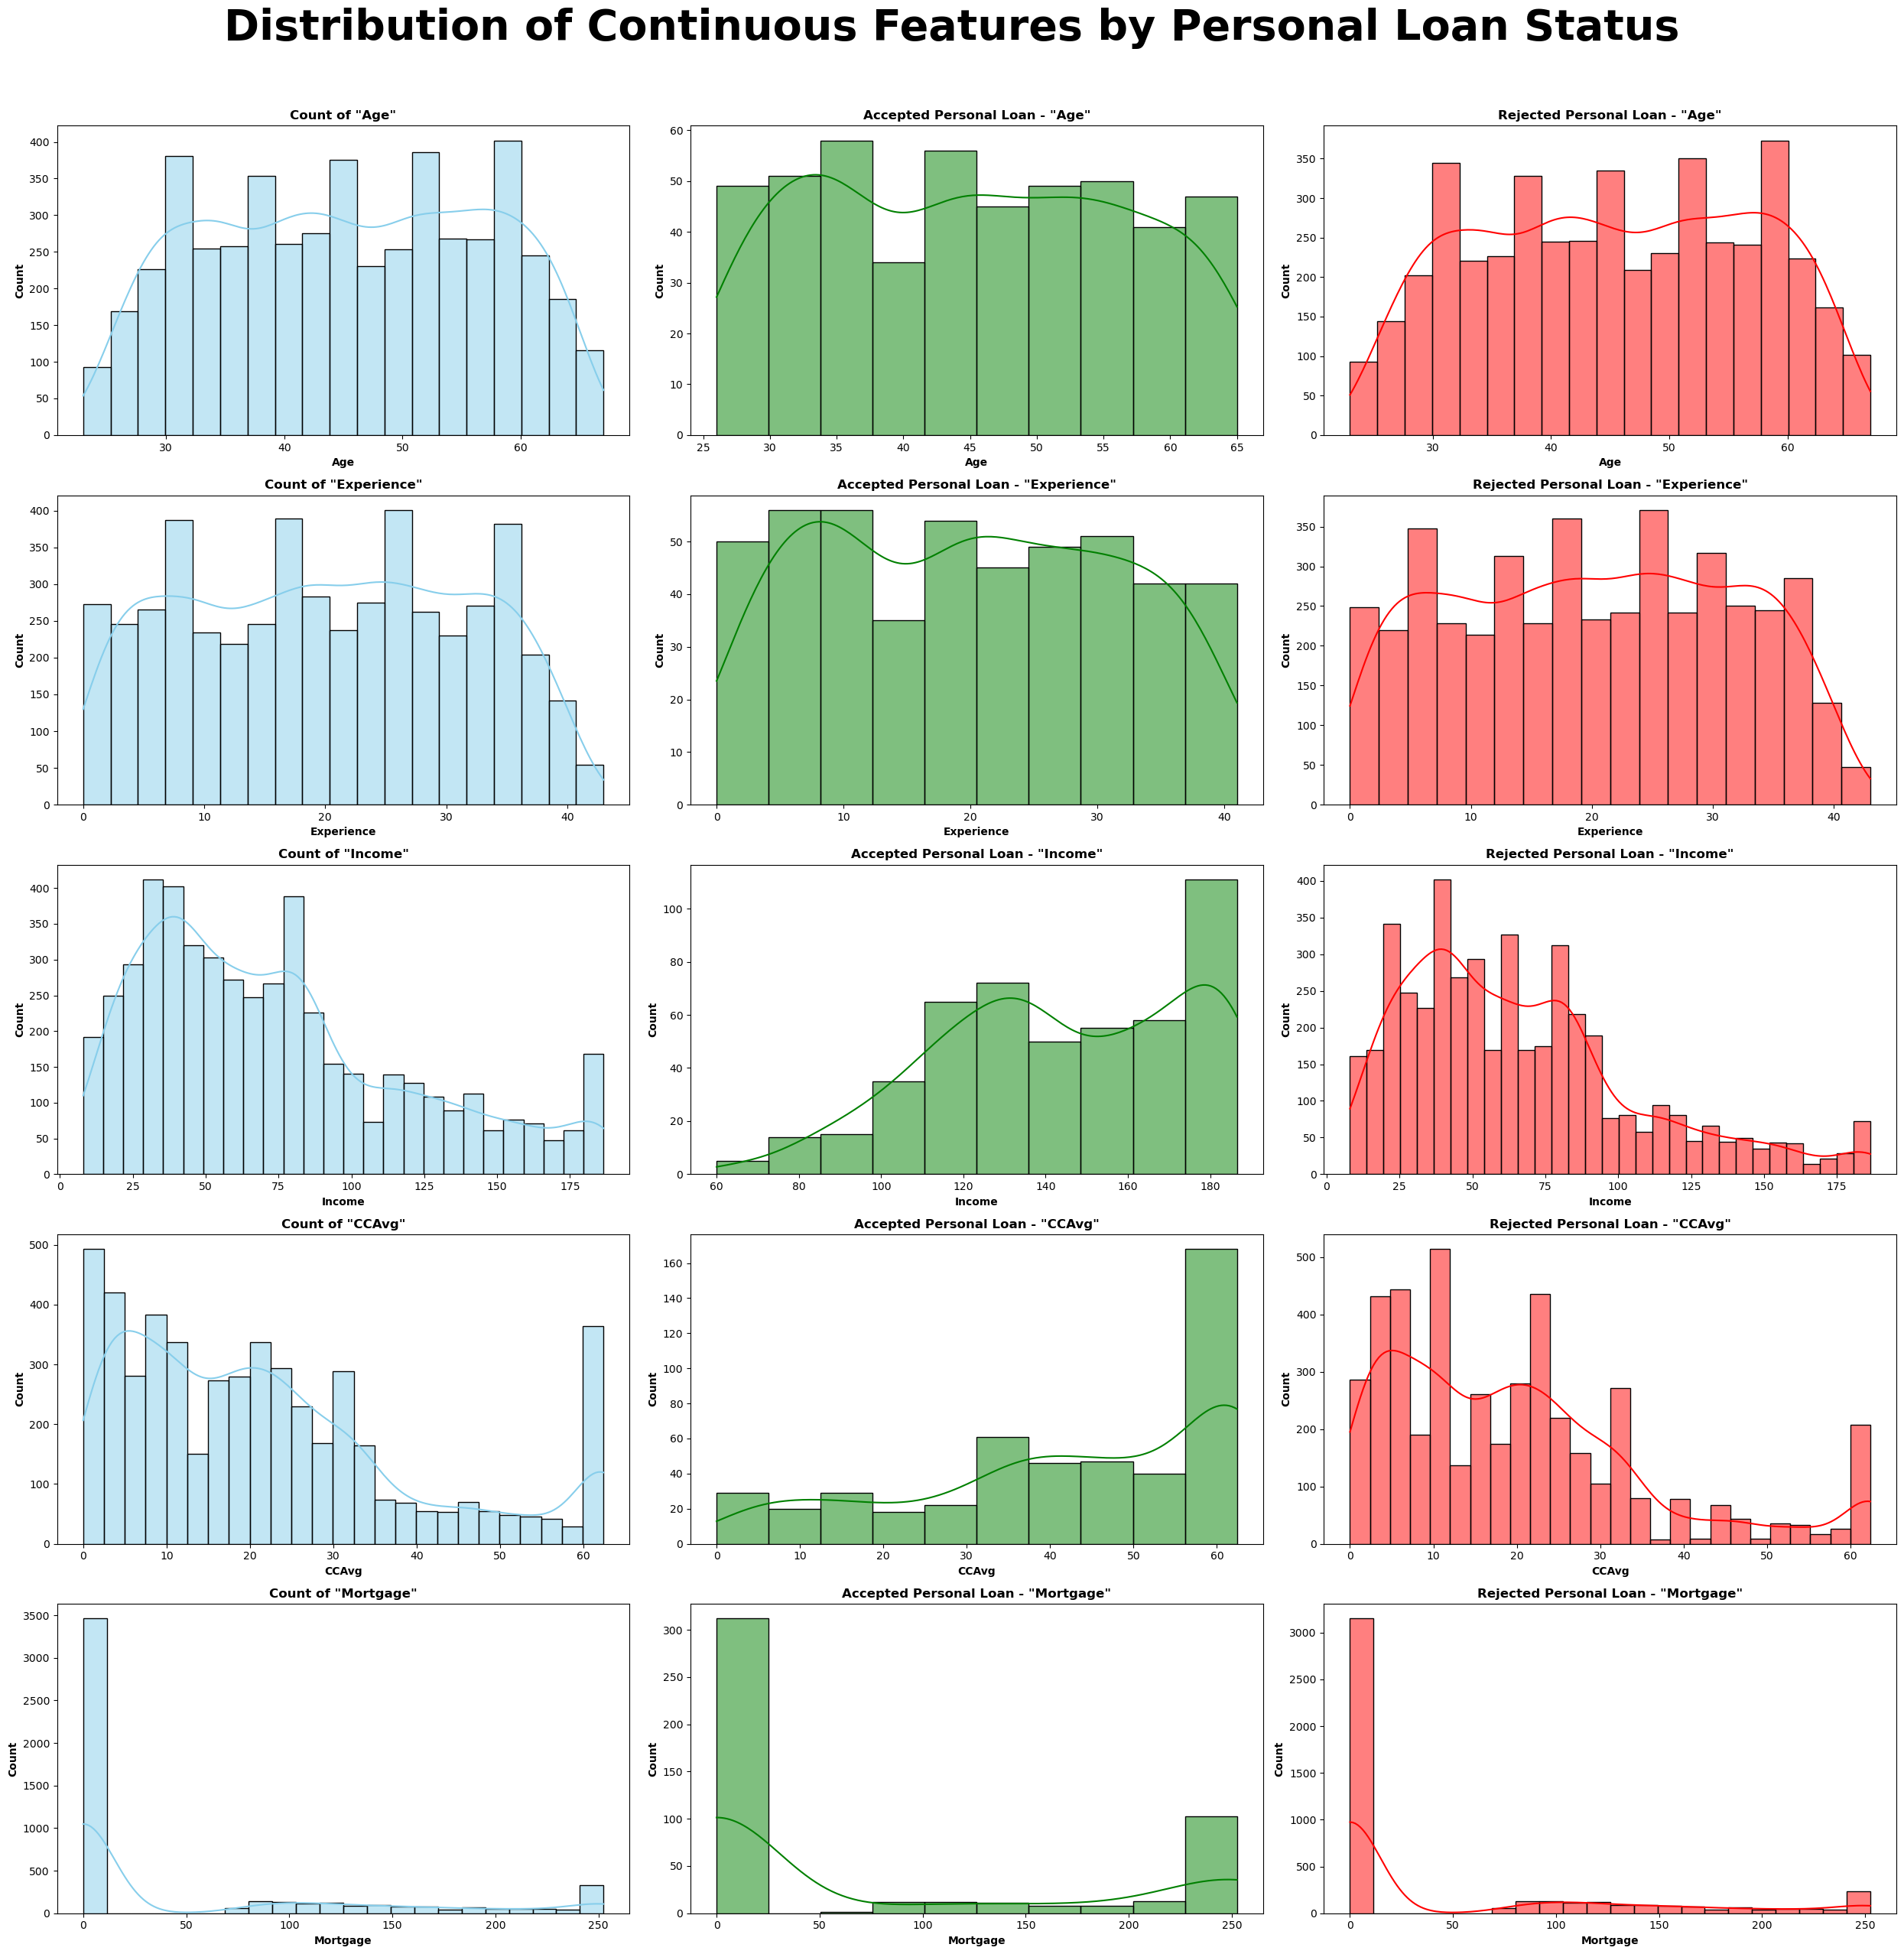

In [22]:
# analizzo le variabili continue in relazione alla variabile target
plt.figure(figsize=(25, 25))

for n, col in enumerate(continue_col):
    # General count plot
    plt.subplot(len(continue_col), 3, (3 * n) + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Count of "{col}"', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')

    # Accepted Personal Loan
    plt.subplot(len(continue_col), 3, (3 * n) + 2)
    sns.histplot(df[df['Personal Loan'] == 1][col], kde=True, color='green')
    plt.title(f'Accepted Personal Loan - "{col}"', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')

    # Rejected Personal Loan
    plt.subplot(len(continue_col), 3, (3 * n) + 3)
    sns.histplot(df[df['Personal Loan'] == 0][col], kde=True, color='red')
    plt.title(f'Rejected Personal Loan - "{col}"', fontweight='bold')
    plt.xlabel(col, fontweight='bold')
    plt.ylabel('Count', fontweight='bold')

plt.subplots_adjust(hspace=1, wspace=1)
plt.suptitle("Distribution of Continuous Features by Personal Loan Status", fontsize=40, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

***Osservazioni***
- Age e Experience sembrano simili alla distribuzione normale
- Le altre presentano tutte asimmetrie chia a dx e chi ha sx determinando
- abbiamo agli estremi sempre un numero alto di osservazioni dato sempre il pre-processing dei dati e la gestione degli outlier con il capping

***molti mortage = 0 allora guardo la distribuzione di sono quelli > 0***

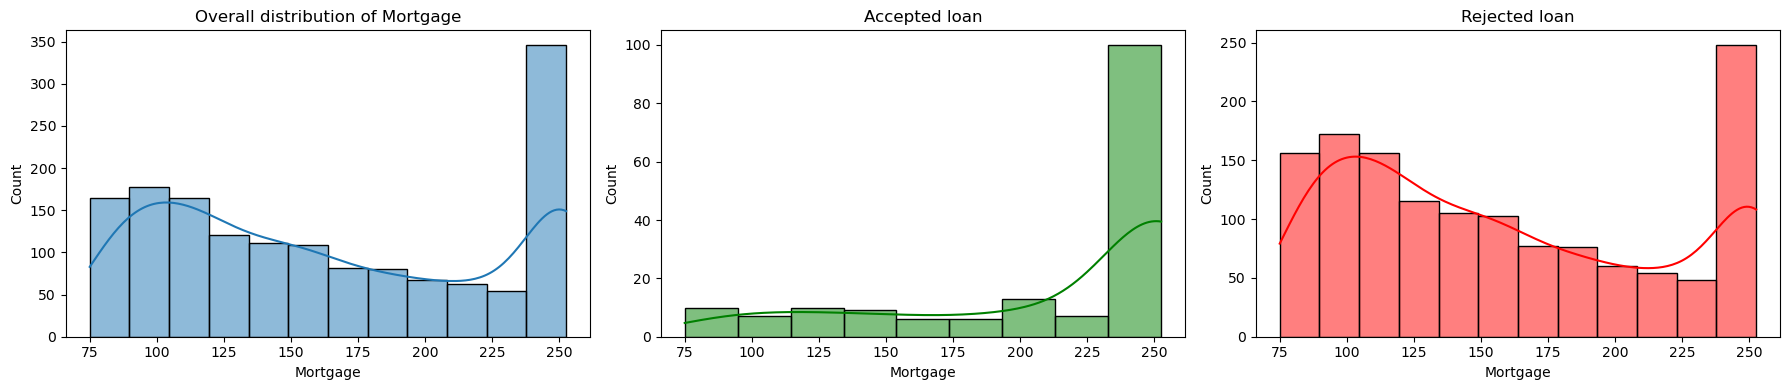

In [23]:
df_filtrato = df[df['Mortgage'] > 0]

accepted_set = df_filtrato[df_filtrato['Personal Loan'] == 1]
rejected_set = df_filtrato[df_filtrato['Personal Loan'] == 0]

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Overall distribution -
sns.histplot(df_filtrato['Mortgage'], kde=True, ax=axes[0])
axes[0].set_title("Overall distribution of Mortgage")
axes[0].set_xlabel("Mortgage")
axes[0].set_ylabel("Count")

# distribution of customers accepted loan -
sns.histplot(accepted_set['Mortgage'], kde=True, ax=axes[1], color='green')
axes[1].set_title("Accepted loan")
axes[1].set_xlabel("Mortgage")
axes[1].set_ylabel("Count")

# distribution of customers rejected loan -
sns.histplot(rejected_set['Mortgage'], kde=True, ax=axes[2], color='red')
axes[2].set_title("Rejected loan")
axes[2].set_xlabel("Mortgage")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

***Osservazioni***
- Asimmetria destra del grafico del Overall Distribution of Mortage e Reject Loan Distribution Mortage, Ultima candela molto alta dovuta al pre-processing dei dati --> gestione degli outlier con il capping
- Grafico dei loan accettati sembra distribuito normalmente fatta eccezzione dell'ultima candela sempre sproporzionata dovuto alla gestione degli outlier 

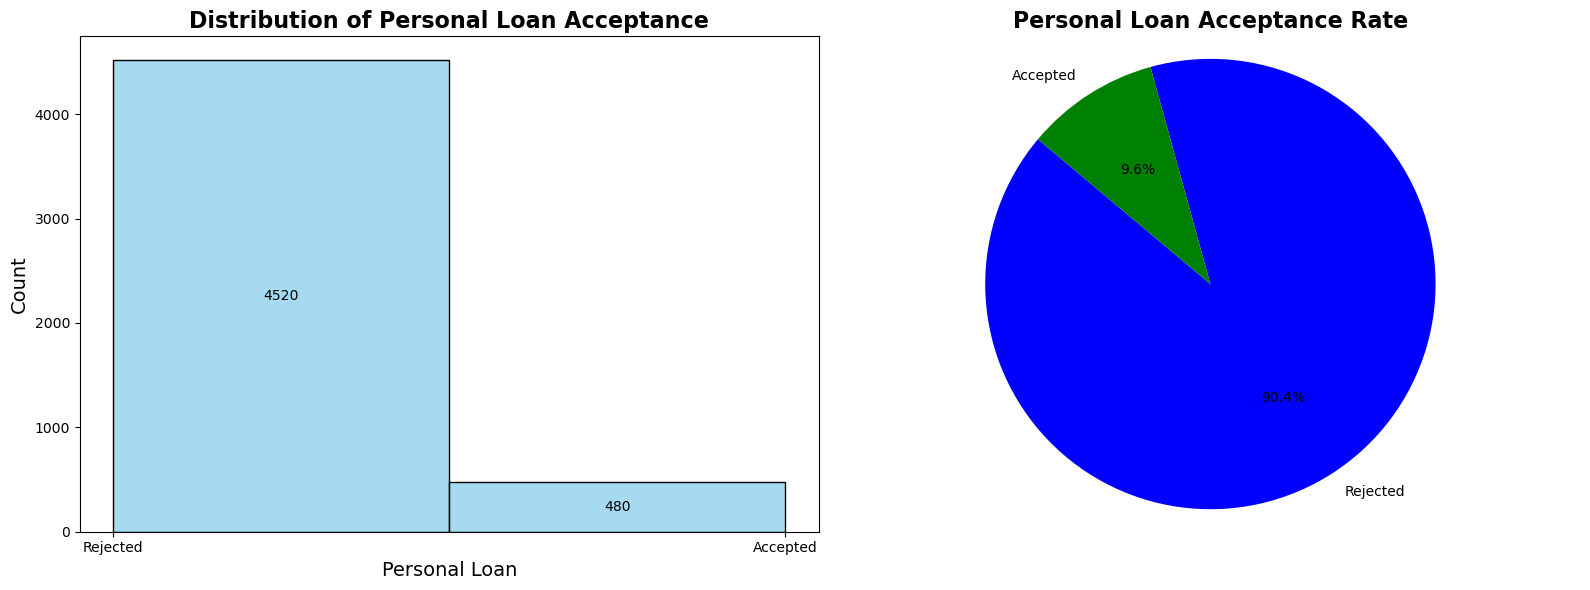

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Istogramma
sns.histplot(df['Personal Loan'], kde=False, bins=2, color='skyblue', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', label_type='center', color='black')
axes[0].set_title('Distribution of Personal Loan Acceptance', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Personal Loan', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Rejected', 'Accepted'])

# Grafico a torta
axes[1].pie(df['Personal Loan'].value_counts(), labels=['Rejected', 'Accepted'], autopct='%1.1f%%', startangle=140, colors=['blue', 'green'])
axes[1].set_title('Personal Loan Acceptance Rate', fontsize=16, fontweight='bold')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


***Osservazioni***
- Classi sbilanciate, pochi accettati e molti rigettati, potremmo avere il problema di classe imbalance

***Analisi multivariata***

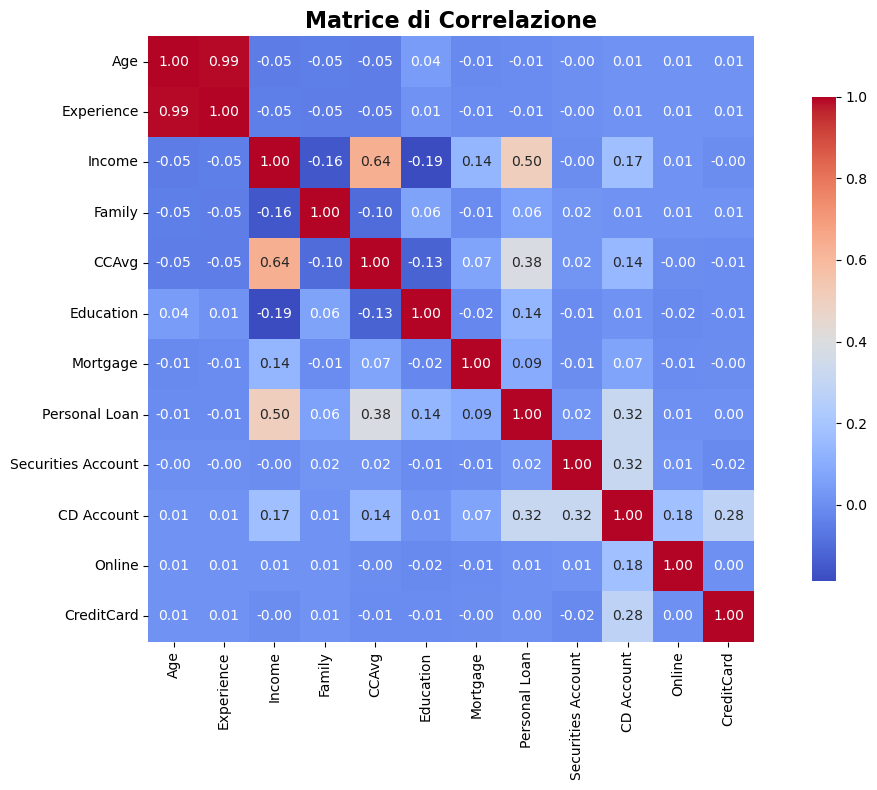

In [25]:
# Generazione della matrice di correlazione
correlation_matrix = df.corr()
# Visualizzazione della matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice di Correlazione', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4 - SPLITTING

In [26]:
# Divido il dataset in features e target
X = df.drop(columns=target_col)
y = df[target_col]


In [27]:
# Divido il dataset in train e test set (80% train, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Divido il test set in validazione e test (50% validazione, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardizzo le features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 5 - Addestramento dei Modelli

Performance del modello sul validation set:
Accuracy: 0.954
F1 Score: 0.7325581395348837


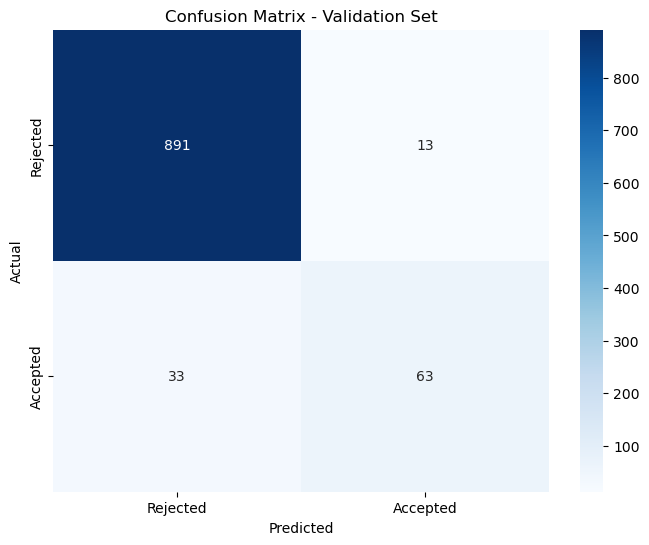

In [28]:
# Modello di regressione logistica
log_reg = LogisticRegression(max_iter=1000, random_state=42)
# Addestro il modello sul training set
log_reg.fit(X_train_scaled, y_train.values.ravel())
# Previsione sul validation set
y_val_pred = log_reg.predict(X_val_scaled)
# Valuto le performance del modello sul validation set
print("Performance del modello sul validation set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
# Matrice di confusione
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Performance del modello SVM sul validation set:
Accuracy: 0.967
F1 Score: 0.8


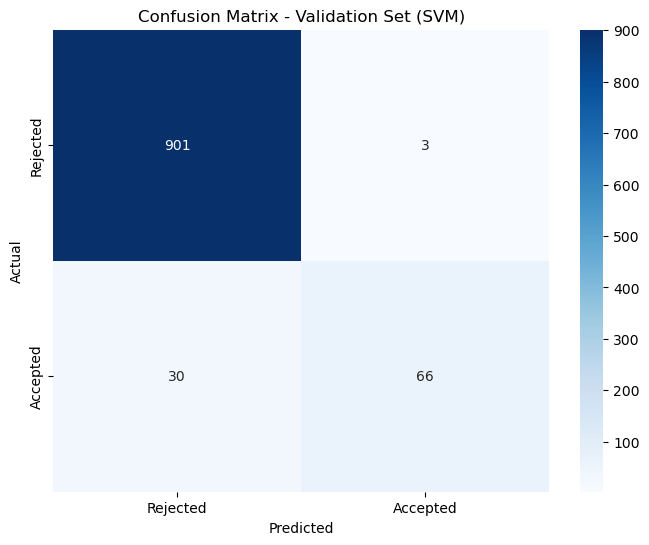

In [29]:
# Modello Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
# Addestro il modello sul training set
svm_model.fit(X_train_scaled, y_train.values.ravel())
# Previsione sul validation set
y_val_pred_svm = svm_model.predict(X_val_scaled)
# Valuto le performance del modello sul validation set
print("Performance del modello SVM sul validation set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print("F1 Score:", f1_score(y_val, y_val_pred_svm))
# Matrice di confusione
cm_svm = confusion_matrix(y_val, y_val_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.title('Confusion Matrix - Validation Set (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6 - HyperParameter Touning

Migliori parametri trovati: {'C': 10, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'}
Performance del modello SVM con i migliori parametri sul validation set:
Accuracy: 0.974
F1 Score: 0.8571428571428571


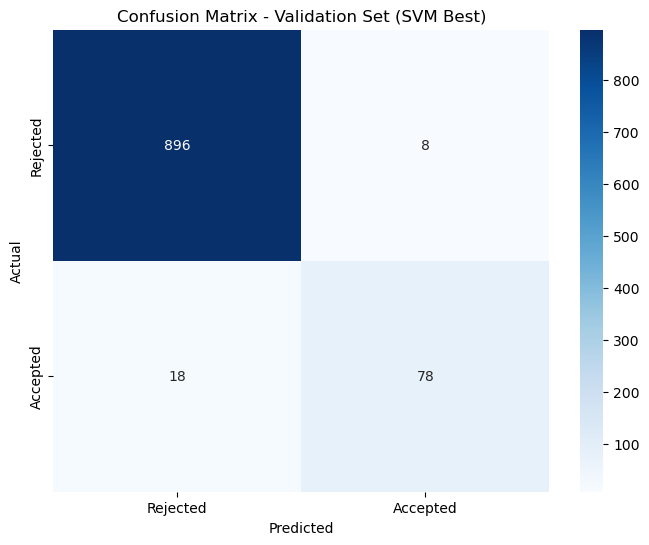

In [30]:
# Faccio l'hyperparameter tuning per il modello SVM

# Definisco i parametri da ottimizzare
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Solo per il kernel 'poly'
}
# Inizializzo il GridSearchCV
grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
# Addestro il modello con il GridSearchCV
grid_search.fit(X_train_scaled, y_train.values.ravel())
# Stampo i migliori parametri trovati
print("Migliori parametri trovati:", grid_search.best_params_)
# Previsione sul validation set con i migliori parametri
y_val_pred_best = grid_search.predict(X_val_scaled)
# Valuto le performance del modello con i migliori parametri sul validation set
print("Performance del modello SVM con i migliori parametri sul validation set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_best))
print("F1 Score:", f1_score(y_val, y_val_pred_best))
# Matrice di confusione
cm_best = confusion_matrix(y_val, y_val_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.title('Confusion Matrix - Validation Set (SVM Best)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Saving the best model
best_SVM_model = grid_search.best_estimator_

Migliori parametri trovati per la regressione logistica: {'C': 1, 'solver': 'saga'}
Performance del modello di regressione logistica con i migliori parametri sul validation set:
Accuracy: 0.954
F1 Score: 0.7325581395348837


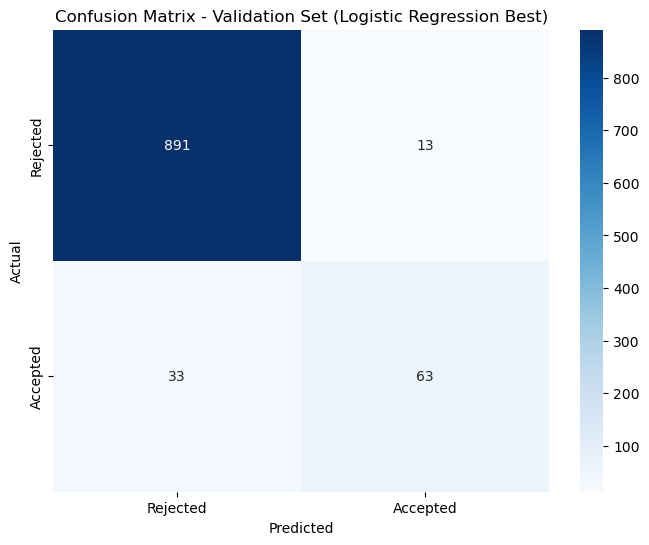

In [31]:
# Hyperparameter tuning per il modello di regressione logistica
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
# Inizializzo il GridSearchCV
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_log_reg, cv=5, scoring='f1', n_jobs=-1)
# Addestro il modello con il GridSearchCV
grid_search_log_reg.fit(X_train_scaled, y_train.values.ravel())
# Stampo i migliori parametri trovati
print("Migliori parametri trovati per la regressione logistica:", grid_search_log_reg.best_params_)
# Previsione sul validation set con i migliori parametri
y_val_pred_log_reg_best = grid_search_log_reg.predict(X_val_scaled)
# Valuto le performance del modello di regressione logistica con i migliori parametri sul validation set
print("Performance del modello di regressione logistica con i migliori parametri sul validation set:")
print("Accuracy:", accuracy_score(y_val, y_val_pred_log_reg_best))
print("F1 Score:", f1_score(y_val, y_val_pred_log_reg_best))
# Matrice di confusione
cm_log_reg_best = confusion_matrix(y_val, y_val_pred_log_reg_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.title('Confusion Matrix - Validation Set (Logistic Regression Best)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# salvo il miglior modello di regressione logistica
best_log_reg_model = grid_search_log_reg.best_estimator_

# 7 - VALUTAZIONE DELLE PERFORMANCE

Performance del modello di regressione logistica sul test set:
Accuracy: 0.966
F1 Score: 0.8023255813953488


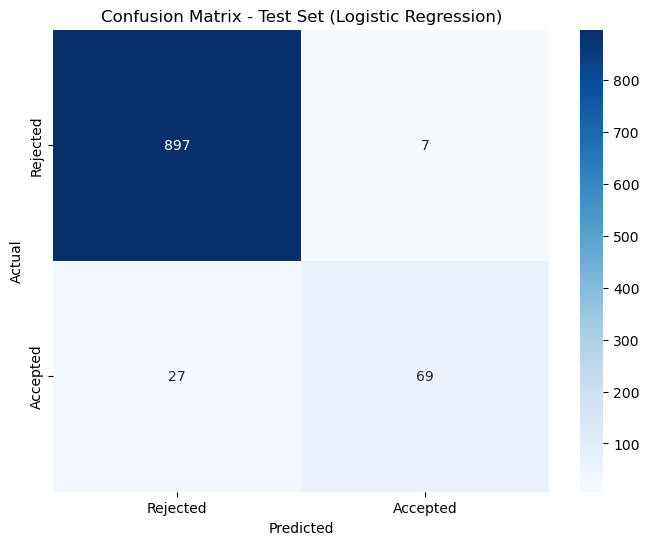

In [32]:
# valuto le performance della regressione logistica e del SVM sul test set
# Previsione sul test set con il modello di regressione logistica
y_test_pred_log_reg = best_log_reg_model.predict(X_test_scaled)
# Valuto le performance del modello di regressione logistica sul test set
print("Performance del modello di regressione logistica sul test set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_test_pred_log_reg))
# Matrice di confusione
cm_test_log_reg = confusion_matrix(y_test, y_test_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.title('Confusion Matrix - Test Set (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Performance del modello SVM sul test set:
Accuracy: 0.978
F1 Score: 0.8877551020408163


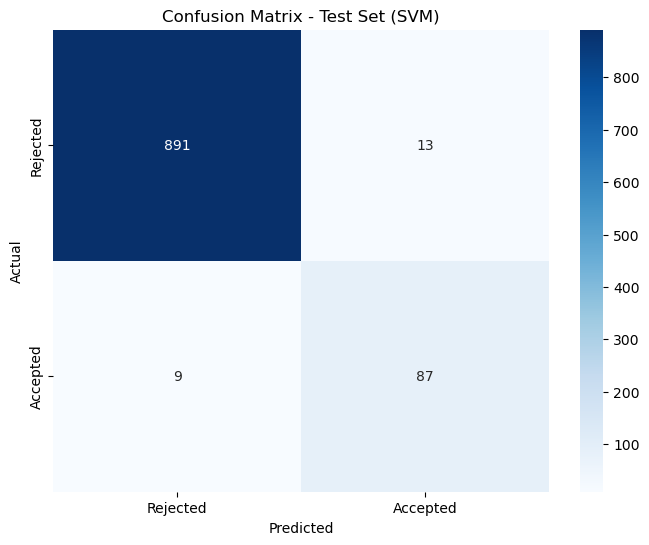

In [33]:
# Valuto le performance del modello SVM sul test set
y_test_pred_svm = best_SVM_model.predict(X_test_scaled)
# Valuto le performance del modello SVM sul test set
print("Performance del modello SVM sul test set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("F1 Score:", f1_score(y_test, y_test_pred_svm))
# Matrice di confusione
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.title('Confusion Matrix - Test Set (SVM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Performance del modello di regressione logistica sul test set:
Accuracy: 0.966
F1 Score: 0.8023255813953488
Performance del modello SVM sul test set:
Accuracy: 0.978
F1 Score: 0.8877551020408163
                 Model  Accuracy  F1 Score
0  Logistic Regression     0.966  0.802326
1                  SVM     0.978  0.887755


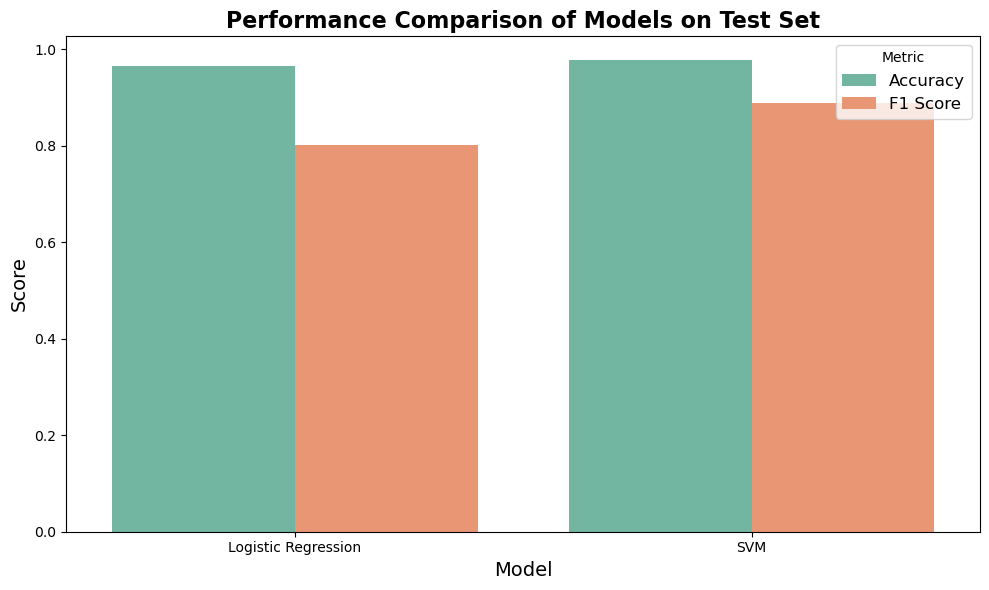

In [34]:
# Confronto le performance dei due modelli sul test set
print("Performance del modello di regressione logistica sul test set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_test_pred_log_reg))
print("Performance del modello SVM sul test set:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_svm))
print("F1 Score:", f1_score(y_test, y_test_pred_svm))
# Confronto le performance dei due modelli sul test set
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_test_pred_log_reg), accuracy_score(y_test, y_test_pred_svm)],
    'F1 Score': [f1_score(y_test, y_test_pred_log_reg), f1_score(y_test, y_test_pred_svm)]
})
print(performance_comparison)
# Confronto le performance dei due modelli sul test set con un barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_comparison.melt(id_vars='Model'), x='Model', y='value', hue='variable', palette='Set2')
plt.title('Performance Comparison of Models on Test Set', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.legend(title='Metric', fontsize=12)
plt.tight_layout()
plt.show()

# 8 - STUDIO STATISTICO SUI RISULTATI DELLA VALUTAZIONE

Statistiche descrittive delle metriche:
         Accuracy  Precision     Recall   F1-score        AUC
count  20.000000  20.000000  20.000000  20.000000  20.000000
mean    0.980600   0.950992   0.843750   0.890266   0.979655
std     0.009992   0.045263   0.101950   0.061900   0.019817
min     0.964000   0.846154   0.625000   0.769231   0.925701
25%     0.975000   0.939693   0.750000   0.852159   0.964556
50%     0.980000   0.956522   0.875000   0.888889   0.987002
75%     0.988000   1.000000   0.916667   0.936170   0.995068
max     0.996000   1.000000   0.958333   0.978723   0.999631


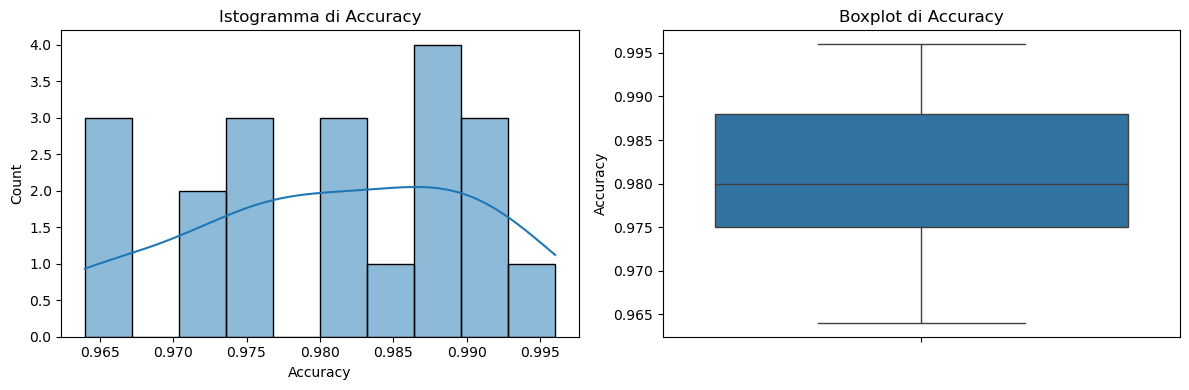

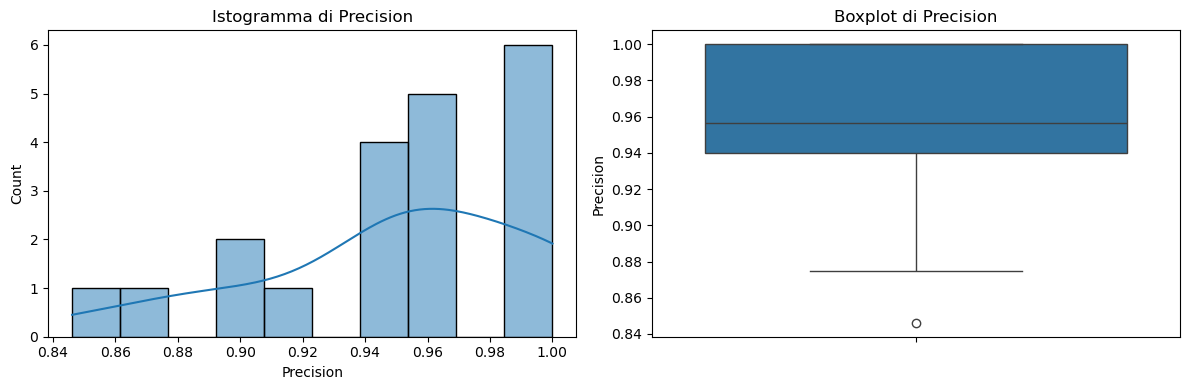

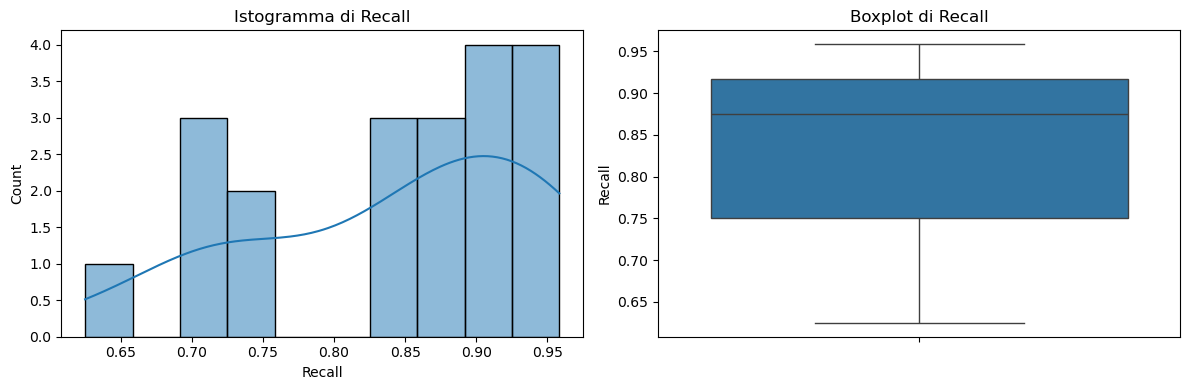

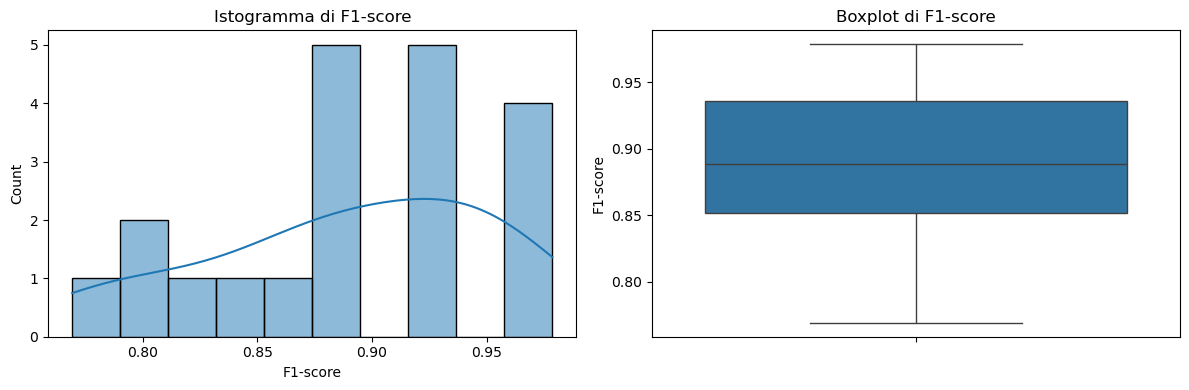

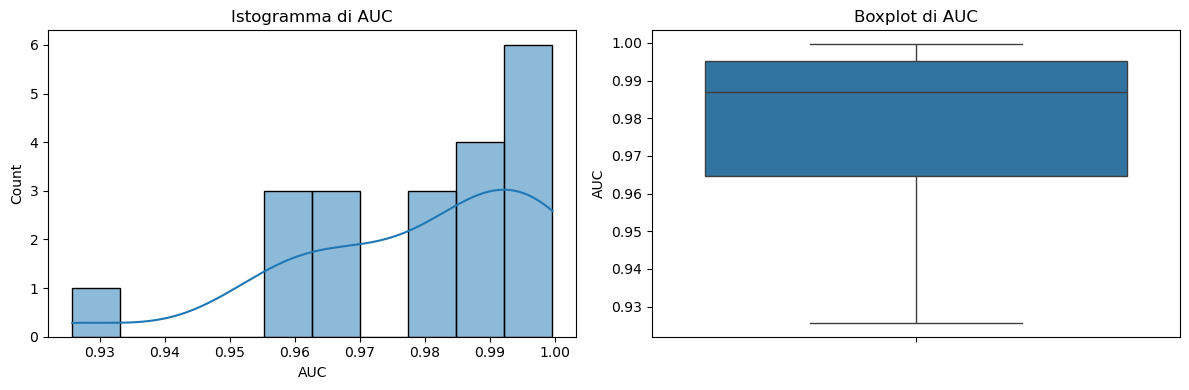

Intervallo di confidenza al 95% per Accuracy: [0.9759, 0.9853]
Intervallo di confidenza al 95% per Precision: [0.9298, 0.9722]
Intervallo di confidenza al 95% per Recall: [0.7960, 0.8915]
Intervallo di confidenza al 95% per F1-score: [0.8613, 0.9192]
Intervallo di confidenza al 95% per AUC: [0.9704, 0.9889]


In [35]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline

# Pipeline con scaler e SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', best_SVM_model)
])

# Definizione delle metriche
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# StratifiedKFold per mantenere il bilanciamento delle classi
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

# Cross-validation
results = cross_validate(
    pipeline, X, y.values.ravel(),
    cv=cv, scoring=scoring, return_train_score=False
)

# Conversione in DataFrame
results_df = pd.DataFrame({
    'Accuracy': results['test_accuracy'],
    'Precision': results['test_precision'],
    'Recall': results['test_recall'],
    'F1-score': results['test_f1'],
    'AUC': results['test_roc_auc']
})

print("Statistiche descrittive delle metriche:\n", results_df.describe())

# Grafici
for metric in results_df.columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(results_df[metric], kde=True, bins=10)
    plt.title(f"Istogramma di {metric}")
    plt.subplot(1, 2, 2)
    sns.boxplot(y=results_df[metric])
    plt.title(f"Boxplot di {metric}")
    plt.tight_layout()
    plt.show()

# Intervallo di confidenza al 95%
for metric in results_df.columns:
    mean = np.mean(results_df[metric])
    std = np.std(results_df[metric], ddof=1)
    ci_low, ci_high = sts.t.interval(0.95, df=cv.get_n_splits()-1, loc=mean, scale=std/np.sqrt(cv.get_n_splits()))
    print(f"Intervallo di confidenza al 95% per {metric}: [{ci_low:.4f}, {ci_high:.4f}]")


# 9 - REGRESSIONE

In [36]:
# Carico il dataset per la regressione lineare semplice
df_reg = pd.read_csv(os.path.join(path, "simple_linear_regression.csv"))
df_reg.head(3)
df_reg.shape

(1000, 5)

In [37]:
# Seleziono le variabili indipendenti e dipendenti
X = df_reg[["Fixed_Deposit_USD"]]
y = df_reg["Account_Balance_USD"]

In [38]:
# Divido il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Modello di regressione lineare semplice
linear_reg = LinearRegression()
# Addestro il modello
linear_reg.fit(X_test, y_test)

LinearRegression()

In [40]:
# Faccio le previsioni sul test set e valuto le performance
y_pred = linear_reg.predict(X_test)

In [41]:
# Coefficienti
print("Coefficiente β1:", linear_reg.coef_[0])
print("Intercetta β0:", linear_reg.intercept_)

Coefficiente β1: 1.05781918078848
Intercetta β0: 1075.6782824621341


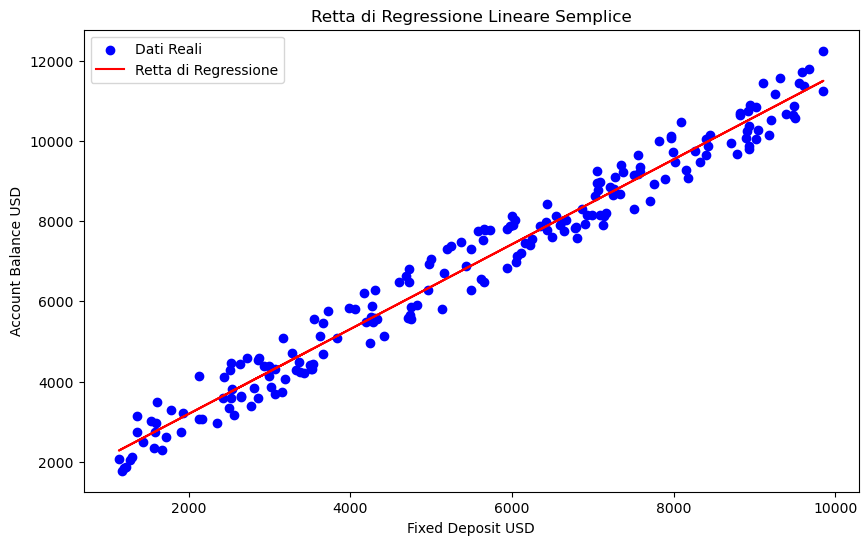

Performance del modello di regressione lineare semplice:
R^2: 0.9717469128574516
Mean Squared Error: 201995.42280097888


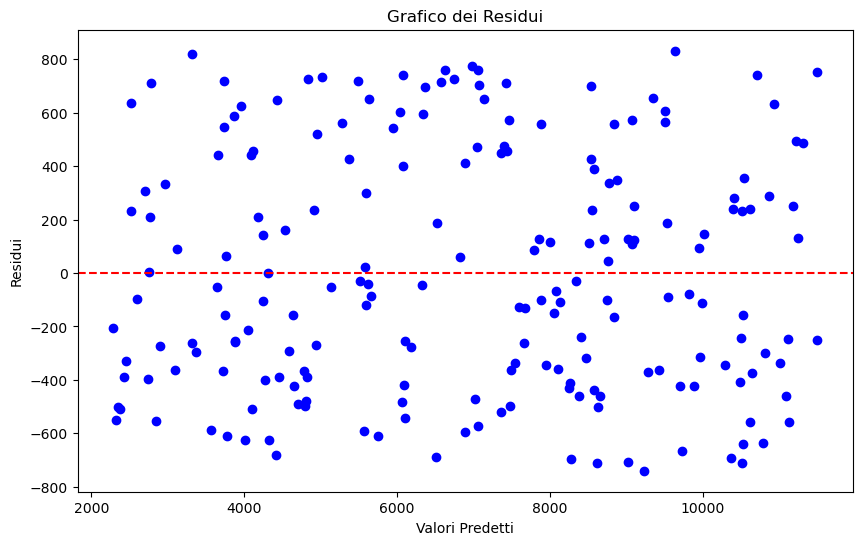

In [42]:
# Grafico della retta di regressione
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Dati Reali')
plt.plot(X_test, y_pred, color='red', label='Retta di Regressione')
plt.title('Retta di Regressione Lineare Semplice')
plt.xlabel('Fixed Deposit USD')
plt.ylabel('Account Balance USD')
plt.legend()
plt.show()
# Valuto le performance del modello di regressione lineare semplice
print("Performance del modello di regressione lineare semplice:")
print("R^2:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
# Grafico dei residui
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Grafico dei Residui')
plt.xlabel('Valori Predetti')
plt.ylabel('Residui')
plt.show()


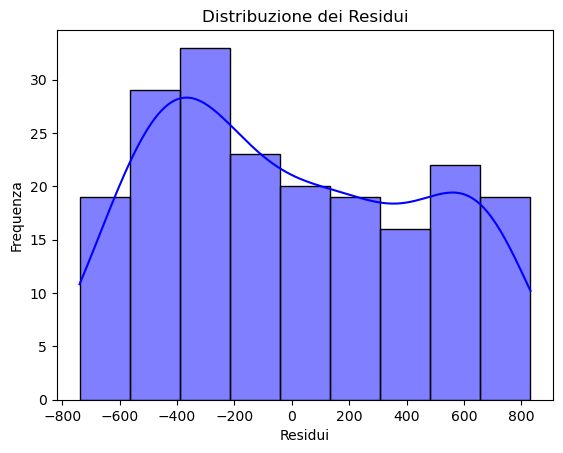

Test di normalità di Shapiro-Wilk:
p-value: 3.7659594771856016e-07
Conclusione del test di normalità:
I residui non seguono una distribuzione normale (rifiutiamo l'ipotesi nulla).


In [ ]:
# Eseguo un'analisi di normalità dei residui
sns.histplot(residuals, kde=True, color='blue')
plt.title('Distribuzione dei Residui')
plt.xlabel('Residui')
plt.ylabel('Frequenza')
plt.show()
# Eseguo il test di normalità di Shapiro-Wilk
shapiro_test = sts.shapiro(residuals)
print("Test di normalità di Shapiro-Wilk:")
print("p-value:", shapiro_test.pvalue)
print("Conclusione del test di normalità:")
if shapiro_test.pvalue > 0.05:
    print("I residui seguono una distribuzione normale (non rigettiamo l'ipotesi nulla).")
else:
    print("I residui non seguono una distribuzione normale (rigettiamo l'ipotesi nulla).")
